In [2]:
#!/usr/bin/env python
import openeye.oechem as oechem
import openeye.oedepict as oedepict
from IPython.display import display

In [3]:
def depict(inpmol, width=500, height=200):
    mol = oechem.OEGraphMol(inpmol)
    from IPython.display import Image
    dopt = oedepict.OEPrepareDepictionOptions()
    dopt.SetDepictOrientation( oedepict.OEDepictOrientation_Horizontal)
    oedepict.OEPrepareDepiction(mol, dopt)
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    disp = oedepict.OE2DMolDisplay(mol, opts)
    img = oedepict.OEImage(width, height)
    oedepict.OERenderMolecule(img,disp)
    return Image(oedepict.OEWriteImageToString("png",img))

# View molecules 

In [4]:
ifs = oechem.oemolistream()
ifs.SetConfTest( oechem.OEAbsoluteConfTest() )
if not ifs.open('../examples/main/two_alkanes.smi'):
    oechem.OEThrow.Warning("Unable to open input file for reading")

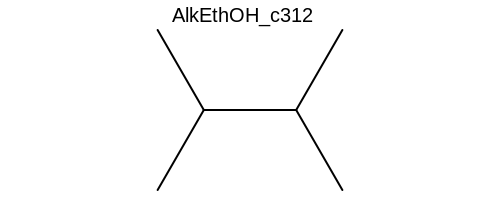

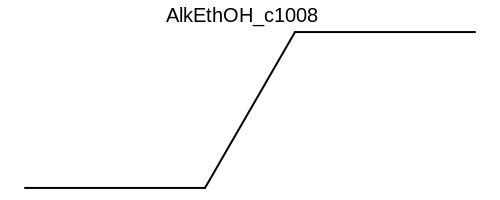

In [5]:
for mol in ifs.GetOEMols():
    display( depict(mol) )

In [6]:
ifs.close()